In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [2]:
# 현재경로 확인
os.getcwd()

'/Users/hyebin/Desktop/github/ML_study/1.회귀분석'

# 1. 데이터 불러오기

In [3]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [4]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

# 2. 다중선형회귀분석

## 2-1. crim, rm, lstat 세개의 변수를 통해 다중회귀적합

In [9]:
target = boston[['Target']]
x_data=boston[['CRIM','RM','LSTAT']] # 변수 여러개
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [10]:
x_data1 = sm.add_constant(x_data, has_constant='add')

In [11]:
multi_model = sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()

In [12]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 20 May 2021   Prob (F-statistic):          1.01e-112
Time:                        11:36:42   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2-2. crim, rm, lstat, b, tax, age, zn, nox, indus 변수로 다중선형회귀분석

In [13]:
x_data2 = boston[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [15]:
x_data2_ = sm.add_constant(x_data2, has_constant = 'add')
x_data2_.head()

,const,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,1.0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,1.0,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,1.0,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,1.0,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,1.0,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [19]:
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = model.fit()

In [20]:
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 20 May 2021   Prob (F-statistic):          5.76e-111
Time:                        11:40:12   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print('fitted_multi_model1의 파라미터')
print(fitted_multi_model.params)
print('')
print('fitted_multi_model2의 파라미터')
print(fitted_multi_model2.params)

fitted_multi_model1의 파라미터
const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

fitted_multi_model2의 파라미터
const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64


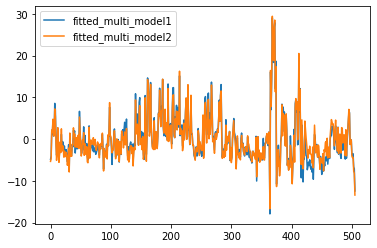

In [26]:
# 잔차 비교
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = 'fitted_multi_model1')
fitted_multi_model2.resid.plot(label = 'fitted_multi_model2')
plt.legend()

## 2-3. 상관계수/산점도를 통해 다중공선성을 확인

In [28]:
# 상관행렬
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


<AxesSubplot:>

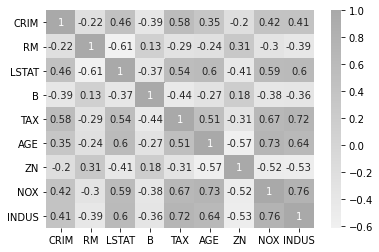

In [29]:
# 상관행렬 시각화
import seaborn as sns
cmap = sns.light_palette('darkgray', as_cmap = True)
sns.heatmap(x_data2.corr(), annot = True, cmap = cmap)

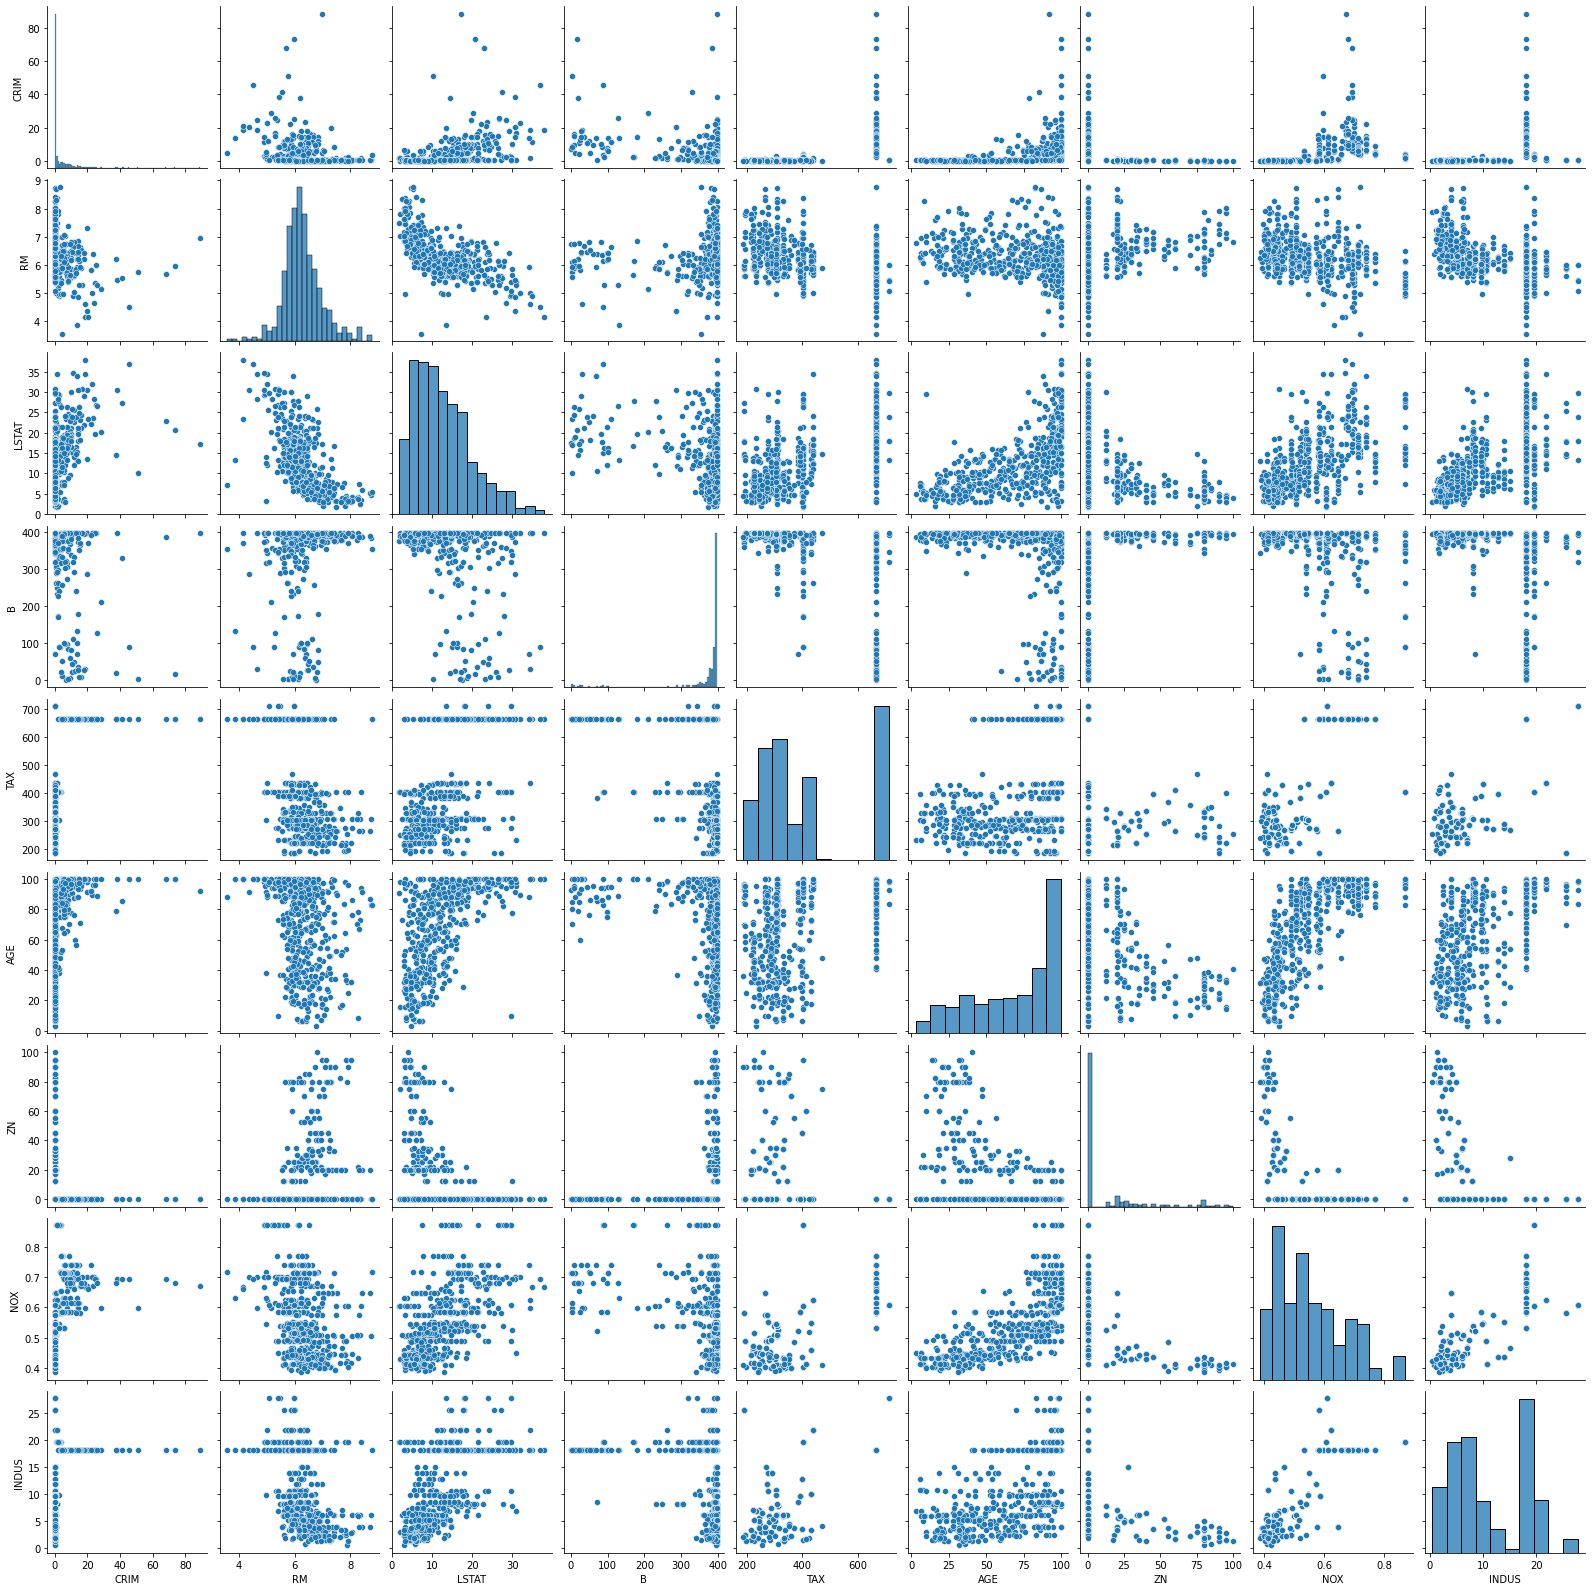

In [30]:
sns.pairplot(x_data2)

## 2-4. VIF를 통한 다중공선성 확인

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [33]:
# NOX 변수 제거 후 다시 VIF 확인
vif = pd.DataFrame()
x_data3 = x_data2.drop('NOX', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [34]:
# RM 변수 제거 후 다시 VIF 확인
vif = pd.DataFrame()
x_data4 = x_data3.drop('RM', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [35]:
# NOX 변수 제거한 데이터(x_data3)에 상수항 추가 후 회귀 모델 적합
# NOX, RM 변수 제거한 데이터(x_data4)에 상수항 추가 후 회귀 모델 적합
x_data3_ = sm.add_constant(x_data3, has_constant = 'add')
multi_model3 = sm.OLS(target, x_data3_)
fitted_multi_model3 = multi_model3.fit()

x_data4_ = sm.add_constant(x_data4, has_constant = 'add')
multi_model4 = sm.OLS(target, x_data4_)
fitted_multi_model4 = multi_model4.fit()

In [36]:
fitted_multi_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Thu, 20 May 2021   Prob (F-statistic):          7.62e-112
Time:                        12:00:35   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
fitted_multi_model4.summary() # R2가 크게 감소함 -> RM을 제거하지 않는 것이 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Thu, 20 May 2021   Prob (F-statistic):           5.53e-89
Time:                        12:00:43   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2-5. 학습 / 검증 데이터 분할

In [39]:
from sklearn.model_selection import train_test_split
X = x_data2_
y = target

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [40]:
train_x.head()

,const,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
13,1.0,0.62976,5.949,8.26,396.90,307,61.8,0.0,0.538,8.14
61,1.0,0.17171,5.966,14.44,378.08,284,93.4,25.0,0.453,5.13
377,1.0,9.82349,6.794,21.24,396.90,666,98.8,0.0,0.671,18.10
39,1.0,0.02763,6.595,4.32,395.63,252,21.8,75.0,0.428,2.95
365,1.0,4.55587,3.561,7.12,354.70,666,87.9,0.0,0.718,18.10


In [41]:
# train_x 회귀모델 적합
model_1 = sm.OLS(train_y, train_x)
fit_1 = model_1.fit()

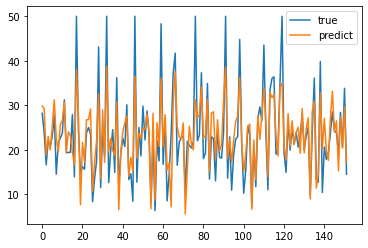

In [44]:
# 테스트데이터에 대한 예측값과 true값 비교
pred_1 = fit_1.predict(test_x)

plt.plot(np.array(test_y), label = 'true')
plt.plot(np.array(pred_1), label = 'predict')
plt.legend()

In [45]:
# NOX 제거하고 학습/검증데이터 분할
X = x_data3_
y = target

train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

# NOX, RM 제거하고 학습/검증데이터 분할
X = x_data4_
y = target

train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [46]:
# 모델 적합
model_2 = sm.OLS(train_y2, train_x2)
fit_2 = model_2.fit()

model_3 = sm.OLS(train_y3, train_x3)
fit_3 = model_3.fit()

In [47]:
# pred 값 비교
pred_2 = fit_2.predict(test_x2)
pred_3 = fit_3.predict(test_x3)

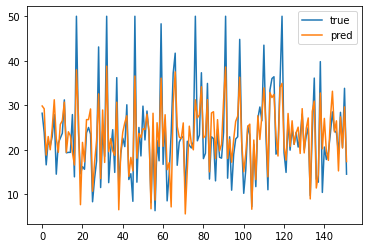

In [48]:
# NOX 제거한 모델의 pred 와 true 비교
plt.plot(np.array(test_y2), label = 'true')
plt.plot(np.array(pred_2), label = 'pred')
plt.legend()

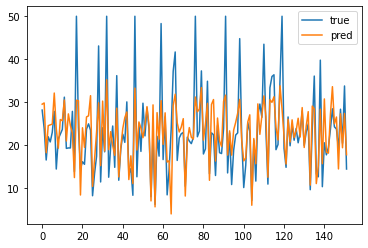

In [49]:
# NOX, RM 제거한 모델의 pred 와 true 비교
plt.plot(np.array(test_y3), label = 'true')
plt.plot(np.array(pred_3), label = 'pred')
plt.legend()

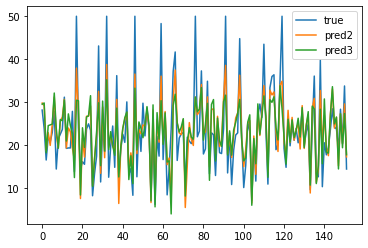

In [50]:
# 전체 비교

plt.plot(np.array(test_y3), label = 'true')
plt.plot(np.array(pred_2), label = 'pred2')
plt.plot(np.array(pred_3), label = 'pred3')
plt.legend()

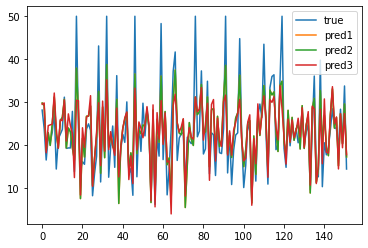

In [51]:
# 전체 비교

plt.plot(np.array(test_y3), label = 'true')
plt.plot(np.array(pred_1), label = 'pred1')
plt.plot(np.array(pred_2), label = 'pred2')
plt.plot(np.array(pred_3), label = 'pred3')
plt.legend()

## 2-6. MSE를 통한 검증데이터에 대한 성능 비교

In [52]:
from sklearn.metrics import mean_squared_error

In [55]:
mean_squared_error(test_y, pred_1) # full 

26.148631468819797

In [56]:
mean_squared_error(test_y, pred_2) 
# NOX 제거 -> 제거 후에 mse 소폭 감소
# 변수 제거해도 될 것 같음

26.140062609846467

In [57]:
mean_squared_error(test_y, pred_3)
# NOX, RM 제거 -> RM까지 제거하니 mse 많이 커짐
# RM 변수는 제거하지 않는 것이 좋을 듯함

38.78845317912826